Decision Tree   
Features: steps & ingredients

Test score: 0.72025    
Kaggle score: 

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import GenericUnivariateSelect, chi2
from sklearn.model_selection import GridSearchCV

from load_data import *
from utils import *

In [3]:
def preprocess(df):
    arr_steps = df['steps'].copy().to_numpy()
    arr_ingr = df['ingredients'].copy().to_numpy()
    for i in range(len(arr_steps)):
        arr_steps[i] = str(arr_steps[i]).replace("[", "").replace("]", "").replace(",", "").replace("'", "")
        arr_ingr[i] = str(arr_ingr[i]).replace("[", "").replace("]", "").replace(",", "").replace("'", "")
    
    X = arr_steps + arr_ingr
    return X

Run the model without feature selection

In [4]:
X = preprocess(df_train)
y = df_train['duration_label']

vectorizer = TfidfVectorizer(sublinear_tf=True, ngram_range=(1,2))
X = vectorizer.fit_transform(X)

In [5]:
dt = DecisionTreeClassifier()
title = "Learning Curves (Decision Tree, before feature selection)"
plot_learning_curves(dt, title, X, y, n_jobs=-1)

Run the model with feature selection

In [1]:
fselect = GenericUnivariateSelect(chi2, mode='percentile', param=20)
X_new = fselect.fit_transform(X, y)

NameError: name 'GenericUnivariateSelect' is not defined

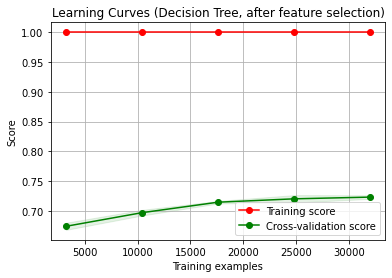

In [10]:
dt = DecisionTreeClassifier()
title = "Learning Curves (Decision Tree, after feature selection)"
plot_learning_curves(dt, title, X_new, y, n_jobs=-1)

In [10]:
# define models and parameters
model = DecisionTreeClassifier(random_state=0)
criteria = ['gini', 'entropy']
max_depths = list(range(10,110,10))

# define grid search
grid = dict(criterion=criteria, max_depth=max_depths)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    if mean != 0:
        print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.758437 using {'criterion': 'gini', 'max_depth': 10}
0.758437 (0.004971) with: {'criterion': 'gini', 'max_depth': 10}
0.740406 (0.006266) with: {'criterion': 'gini', 'max_depth': 20}
0.728531 (0.005831) with: {'criterion': 'gini', 'max_depth': 30}
0.725219 (0.006479) with: {'criterion': 'gini', 'max_depth': 40}
0.723406 (0.005437) with: {'criterion': 'gini', 'max_depth': 50}
0.722594 (0.006240) with: {'criterion': 'gini', 'max_depth': 60}
0.724656 (0.005100) with: {'criterion': 'gini', 'max_depth': 70}
0.721562 (0.006524) with: {'criterion': 'gini', 'max_depth': 80}
0.721344 (0.005588) with: {'criterion': 'gini', 'max_depth': 90}
0.721969 (0.004973) with: {'criterion': 'gini', 'max_depth': 100}
0.750656 (0.007314) with: {'criterion': 'entropy', 'max_depth': 10}
0.738938 (0.005755) with: {'criterion': 'entropy', 'max_depth': 20}
0.723875 (0.004461) with: {'criterion': 'entropy', 'max_depth': 30}
0.722187 (0.001720) with: {'criterion': 'entropy', 'max_depth': 40}
0.720562 (0.00369